In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logomaker
import re
import pdb
import glob
%matplotlib inline

# For drawing rectangles
from matplotlib.patches import Rectangle
pink = np.array([247, 198, 219])/256
purple = np.array([126, 66, 149])/256
red = np.array([228, 33, 63])/256

# Load figure style
plt.style.use('fig_style.txt')

done making figures/fig_6A_chromosomal_logo.pdf. 


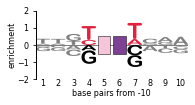

In [2]:
# Load logo
logo_file_name = 'csv_logos/chromosomal_logo.csv'
logo_df = pd.read_csv(logo_file_name, index_col=0)

# Create a figure
fig, ax = plt.subplots(1, 1,
                       figsize=[2.75,1.5], 
                       sharex=False, sharey=False)

# Draw logo
logo = logomaker.Logo(df=logo_df,
                      ax=ax,
                      center_values=True,
                      font_name='Arial Rounded MT Bold',
                      show_spines=False,
                      flip_below=False)

# Color glyphs
logo.style_glyphs(color=red)
logo.style_glyphs_below(color='k')
pos=5
for c in 'ACGT':
    for k in range(1,11):
        if (k != pos-1) and (k != pos+2):
            logo.style_single_glyph(c=c, p=k, color='gray')

# Annotate plots, etc.
ax.spines['left'].set_visible(True)
ax.set_ylim([-2, 2])
ax.set_yticks([-2, -1, 0, 1, 2])
ax.set_xticks(logo_df.index)
ax.set_ylabel('enrichment', labelpad=.5)
ax.set_xlabel('base pairs from -10', labelpad=.5)
ax.tick_params(axis='x', length=0, pad=0)

# Create a Rectangle patch
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((pos-.4,-.5),.8,1,linewidth=.5,edgecolor='k',facecolor=pink))
ax.add_patch(Rectangle((pos+.6,-.5),.8,1,linewidth=.5,edgecolor='k',facecolor=purple))

# Finalize and save plot
fig.tight_layout() 
file_name = 'figures/fig_6A_chromosomal_logo.pdf'
fig.savefig(file_name)
print(f'done making {file_name}. ')